## Morgan Data- Whole Data frame -1992 to 2019

*****
Index of notebook
***
`Please note-This ipynb uses the whole df for Morgan and processes locally`

1. I did some additional plots using the whole data frame. 
2. Personally I prefer comparing 9 year periods for Nueces Vs Morgan
3. I am using this notebook mainly for looking at boxplot and voilin plots of individual years.Some ACF has also been done for individual years
4. A different syntax is used here to remove outliers
5. **This ipynb does take a long time to run due to data volume** 
Hence `All plots are included in the report for viewer convinience, and also get saved to the *MorganWhole* folder`


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv("https://tamucc-ir.tdl.org/bitstream/handle/1969.6/87797/MorgansPoint_RawDataOnly.csv?sequence=1&isAllowed=y")


In [43]:
df = df.rename(columns={'#date+time': 'DateWTime', '503-pwl': 'TideHeight'})
df =df.set_index('DateWTime')
df

,TideHeight
DateWTime,
1992-05-20T02:00:00Z,2.035
1992-05-20T02:06:00Z,2.024
1992-05-20T02:12:00Z,2.019
1992-05-20T02:18:00Z,2.029
1992-05-20T02:24:00Z,2.007
...,...
2019-12-31T23:30:00Z,1.439
2019-12-31T23:36:00Z,1.445
2019-12-31T23:42:00Z,1.429


In [44]:
df['TideHeight'].isnull().sum() #count missing values

62664

In [45]:
#interpolate missing values
df = df.interpolate(method='linear')
df

,TideHeight
DateWTime,
1992-05-20T02:00:00Z,2.035
1992-05-20T02:06:00Z,2.024
1992-05-20T02:12:00Z,2.019
1992-05-20T02:18:00Z,2.029
1992-05-20T02:24:00Z,2.007
...,...
2019-12-31T23:30:00Z,1.439
2019-12-31T23:36:00Z,1.445
2019-12-31T23:42:00Z,1.429


In [46]:
df['Date'] = df.index.str.slice(0,10)
df['Time'] = df.index.str.slice(11,16)
df

,TideHeight,Date,Time
DateWTime,,,
1992-05-20T02:00:00Z,2.035,1992-05-20,02:00
1992-05-20T02:06:00Z,2.024,1992-05-20,02:06
1992-05-20T02:12:00Z,2.019,1992-05-20,02:12
1992-05-20T02:18:00Z,2.029,1992-05-20,02:18
1992-05-20T02:24:00Z,2.007,1992-05-20,02:24
...,...,...,...
2019-12-31T23:30:00Z,1.439,2019-12-31,23:30
2019-12-31T23:36:00Z,1.445,2019-12-31,23:36
2019-12-31T23:42:00Z,1.429,2019-12-31,23:42


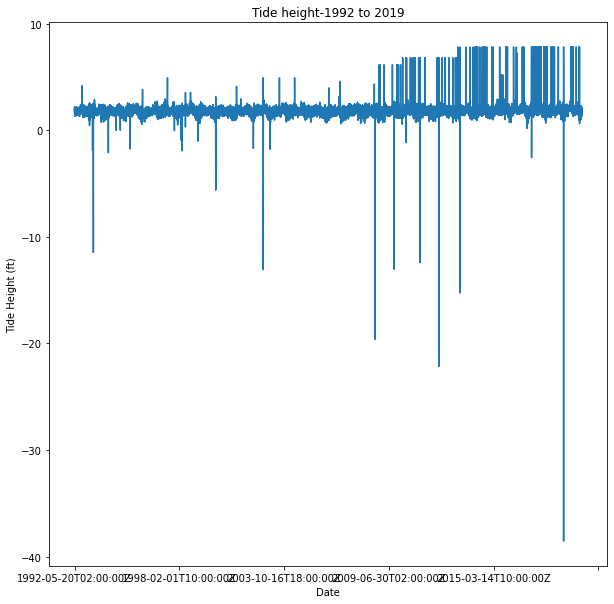

In [47]:
#plot tide height
df['TideHeight'].plot(figsize=(10,10))
plt.title('Tide height-1992 to 2019')
plt.xlabel('Date')
plt.ylabel('Tide Height (ft)')
#save plot
plt.savefig('MorganWhole/MorganTideHeightAcrossWholeDF.png', facecolor='w')
plt.show()

In [48]:
#divide df into years
df1992 = df.loc['1992-01-01':'1992-12-31']
df1993 = df.loc['1993-01-01':'1993-12-31']
df1994 = df.loc['1994-01-01':'1994-12-31']
df1995 = df.loc['1995-01-01':'1995-12-31']
df1996 = df.loc['1996-01-01':'1996-12-31']
df1997 = df.loc['1997-01-01':'1997-12-31']
df1998 = df.loc['1998-01-01':'1998-12-31']
df1999 = df.loc['1999-01-01':'1999-12-31']
df2000 = df.loc['2000-01-01':'2000-12-31']
df2001 = df.loc['2001-01-01':'2001-12-31']
df2002 = df.loc['2002-01-01':'2002-12-31']
df2003 = df.loc['2003-01-01':'2003-12-31']
df2004 = df.loc['2004-01-01':'2004-12-31']
df2005 = df.loc['2005-01-01':'2005-12-31']
df2006 = df.loc['2006-01-01':'2006-12-31']
df2007 = df.loc['2007-01-01':'2007-12-31']
df2008 = df.loc['2008-01-01':'2008-12-31']
df2009 = df.loc['2009-01-01':'2009-12-31']
df2010 = df.loc['2010-01-01':'2010-12-31']
df2011 = df.loc['2011-01-01':'2011-12-31']
df2012 = df.loc['2012-01-01':'2012-12-31']
df2013 = df.loc['2013-01-01':'2013-12-31']
df2014 = df.loc['2014-01-01':'2014-12-31']
df2015 = df.loc['2015-01-01':'2015-12-31']
df2016 = df.loc['2016-01-01':'2016-12-31']
df2017 = df.loc['2017-01-01':'2017-12-31']
df2018 = df.loc['2018-01-01':'2018-12-31']
df2019 = df.loc['2019-01-01':'2019-12-31']

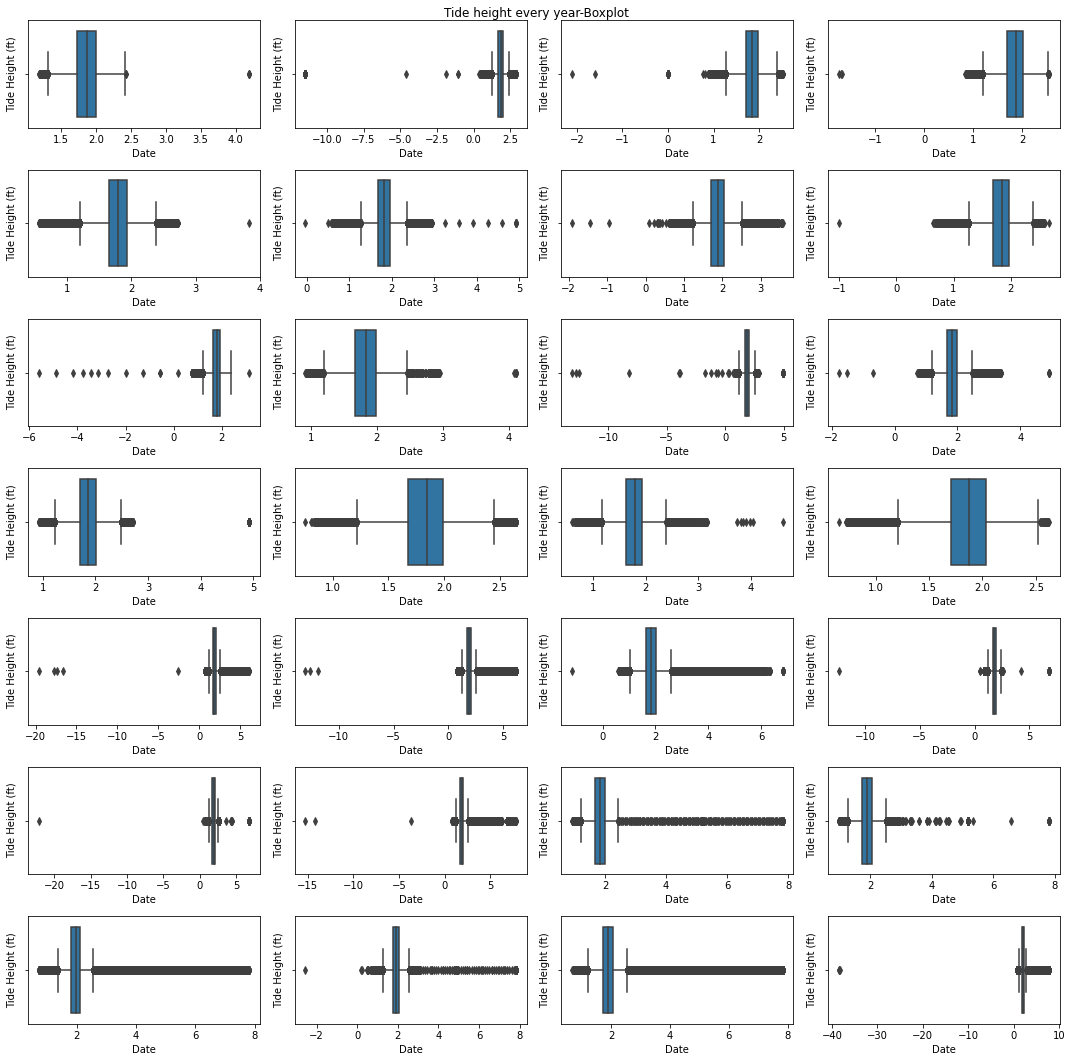

In [49]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(7,4, figsize=(15,15))
fig.suptitle('Tide height every year-Boxplot')


#define function to plot boxplot
def boxplot(df, ax):
    sns.boxplot(df['TideHeight'], ax=ax)
    #give title to each subplot
    ax.set_xlabel('Date')
    ax.set_ylabel('Tide Height (ft)')


#cycle through years and plot boxplot
for i, ax in enumerate(axs.flat):
    if i == 0:
        boxplot(df1992, ax)
    elif i == 1:
        boxplot(df1993, ax)
    elif i == 2:
        boxplot(df1994, ax)
    elif i == 3:
        boxplot(df1995, ax)
    elif i == 4:
        boxplot(df1996, ax)
    elif i == 5:
        boxplot(df1997, ax)
    elif i == 6:
        boxplot(df1998, ax)
    elif i == 7:
        boxplot(df1999, ax)
    elif i == 8:
        boxplot(df2000, ax)
    elif i == 9:
        boxplot(df2001, ax)
    elif i == 10:
        boxplot(df2002, ax)
    elif i == 11:
        boxplot(df2003, ax)
    elif i == 12:
        boxplot(df2004, ax)
    elif i == 13:
        boxplot(df2005, ax)
    elif i == 14:
        boxplot(df2006, ax)
    elif i == 15:
        boxplot(df2007, ax)
    elif i == 16:
        boxplot(df2008, ax)
    elif i == 17:
        boxplot(df2009, ax)
    elif i == 18:
        boxplot(df2010, ax)
    elif i == 19:
        boxplot(df2011, ax)
    elif i == 20:
        boxplot(df2012, ax)
    elif i == 21:
        boxplot(df2013, ax)
    elif i == 22:
        boxplot(df2014, ax)
    elif i == 23:
        boxplot(df2015, ax)
    elif i == 24:
        boxplot(df2016, ax)
    elif i == 25:
        boxplot(df2017, ax)
    elif i == 26:
        boxplot(df2018, ax)
    elif i == 27:
        boxplot(df2019, ax)
        
#tight layout
plt.tight_layout()
#save plot
plt.savefig('MorganWhole/MorganTideHeightBoxplot.png', facecolor='w')
plt.show()


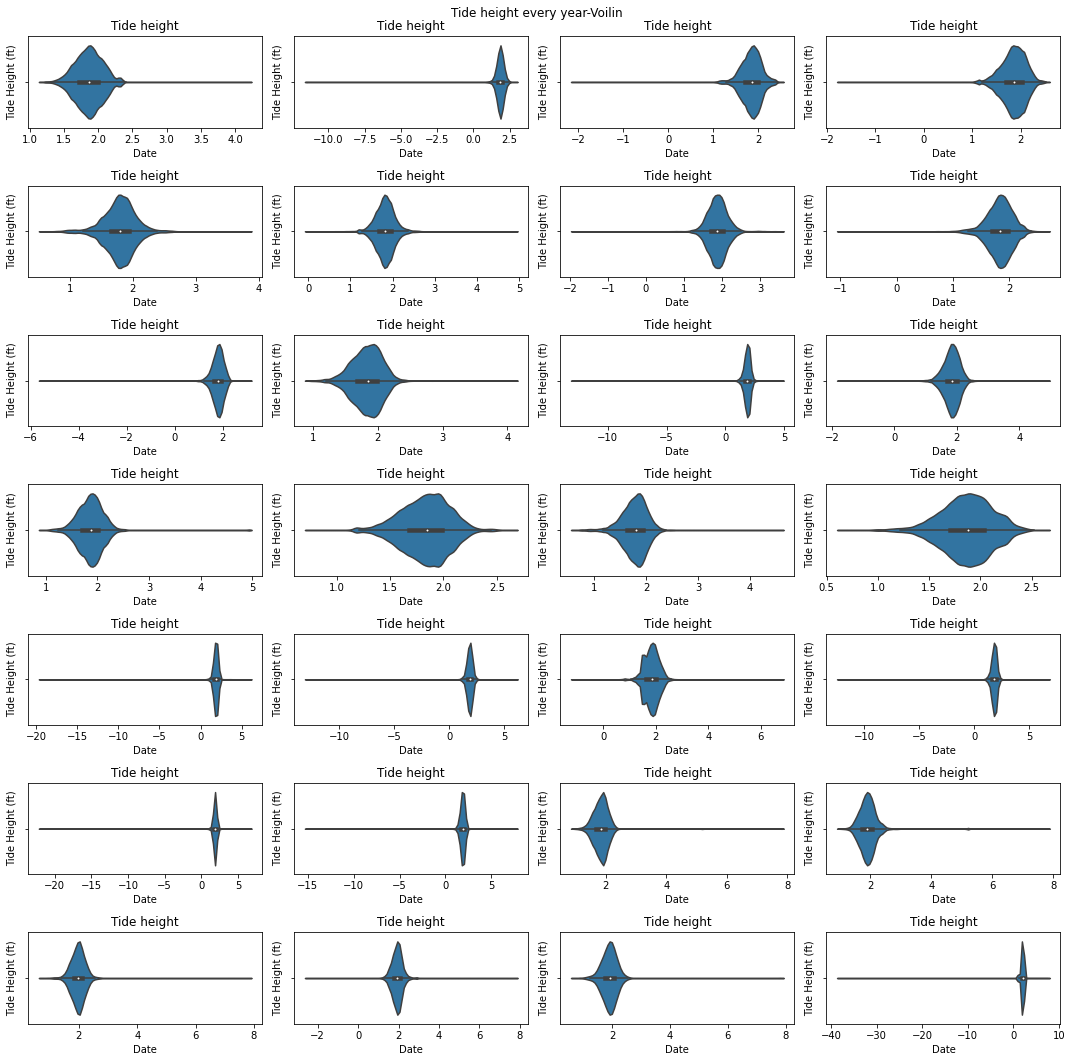

In [50]:
fig, axs = plt.subplots(7,4, figsize=(15,15))
fig.suptitle('Tide height every year-Voilin')

#define function to plot voilin plot
def violinplot(df, ax):
    sns.violinplot(df['TideHeight'], ax=ax)
    ax.set_title('Tide height')
    ax.set_xlabel('Date')
    ax.set_ylabel('Tide Height (ft)')

#cycle through years and plot violin plot
for i, ax in enumerate(axs.flat):
    if i == 0:
        violinplot(df1992, ax)
    elif i == 1:
        violinplot(df1993, ax)
    elif i == 2:
        violinplot(df1994, ax)
    elif i == 3:
        violinplot(df1995, ax)
    elif i == 4:
        violinplot(df1996, ax)
    elif i == 5:
        violinplot(df1997, ax)
    elif i == 6:
        violinplot(df1998, ax)
    elif i == 7:
        violinplot(df1999, ax)
    elif i == 8:
        violinplot(df2000, ax)
    elif i == 9:
        violinplot(df2001, ax)
    elif i == 10:
        violinplot(df2002, ax)
    elif i == 11:
        violinplot(df2003, ax)
    elif i == 12:
        violinplot(df2004, ax)
    elif i == 13:
        violinplot(df2005, ax)
    elif i == 14:
        violinplot(df2006, ax)
    elif i == 15:
        violinplot(df2007, ax)
    elif i == 16:
        violinplot(df2008, ax)
    elif i == 17:
        violinplot(df2009, ax)
    elif i == 18:
        violinplot(df2010, ax)
    elif i == 19:
        violinplot(df2011, ax)
    elif i == 20:
        violinplot(df2012, ax)
    elif i == 21:
        violinplot(df2013, ax)
    elif i == 22:
        violinplot(df2014, ax)
    elif i == 23:
        violinplot(df2015, ax)
    elif i == 24:
        violinplot(df2016, ax)
    elif i == 25:
        violinplot(df2017, ax)
    elif i == 26:
        violinplot(df2018, ax)
    elif i == 27:
        violinplot(df2019, ax)
        

plt.tight_layout()
plt.savefig('MorganWhole/MorganTideHeightVoilin.png', facecolor='w')
plt.show()


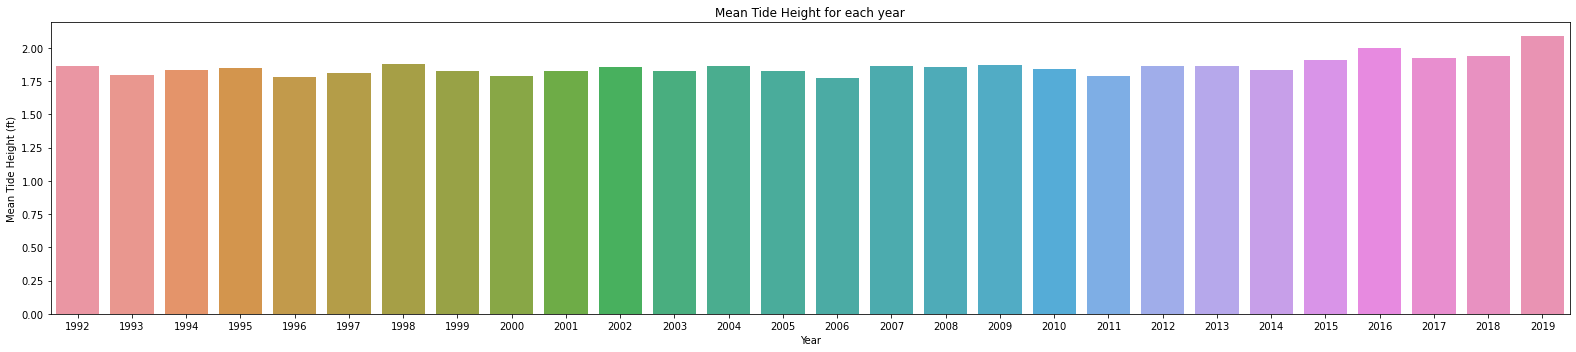

In [51]:
#define a function to take mean of tide height for each year
def mean_tide_height(df):
    return df['TideHeight'].mean()

mean_tide_height(df1992)
mean_tide_height(df1993)
mean_tide_height(df1994)
mean_tide_height(df1995)
mean_tide_height(df1996)
mean_tide_height(df1997)
mean_tide_height(df1998)
mean_tide_height(df1999)
mean_tide_height(df2000)
mean_tide_height(df2001)
mean_tide_height(df2002)
mean_tide_height(df2003)
mean_tide_height(df2004)
mean_tide_height(df2005)
mean_tide_height(df2006)
mean_tide_height(df2007)
mean_tide_height(df2008)
mean_tide_height(df2009)
mean_tide_height(df2010)
mean_tide_height(df2011)
mean_tide_height(df2012)
mean_tide_height(df2013)
mean_tide_height(df2014)
mean_tide_height(df2015)
mean_tide_height(df2016)
mean_tide_height(df2017)
mean_tide_height(df2018)
mean_tide_height(df2019)

#plot bar chart of mean tide height for each year
df = pd.DataFrame({'Year': ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', 
'2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
                     'Mean Tide Height': [mean_tide_height(df1992), mean_tide_height(df1993), mean_tide_height(df1994), mean_tide_height(df1995), mean_tide_height(df1996), mean_tide_height(df1997), mean_tide_height(df1998), mean_tide_height(df1999), mean_tide_height(df2000), mean_tide_height(df2001), mean_tide_height(df2002), mean_tide_height(df2003), mean_tide_height(df2004), mean_tide_height(df2005), mean_tide_height(df2006), mean_tide_height(df2007), mean_tide_height(df2008), mean_tide_height(df2009), mean_tide_height(df2010), mean_tide_height(df2011), mean_tide_height(df2012), mean_tide_height(df2013), 
                     mean_tide_height(df2014), mean_tide_height(df2015), mean_tide_height(df2016), mean_tide_height(df2017), mean_tide_height(df2018), mean_tide_height(df2019)]})

plt.figure(figsize=(22,5))
sns.barplot(x='Year', y='Mean Tide Height', data=df)
plt.title('Mean Tide Height for each year')
plt.xlabel('Year')
plt.ylabel('Mean Tide Height (ft)')
#tight layout
plt.tight_layout()

plt.show()

In [52]:
# define function to remove outliers
def remove_outliers(df):
    return df[(np.abs(df['TideHeight'] - df['TideHeight'].mean()) <= (5 * df['TideHeight'].std()))] 

df1992noOutlier = remove_outliers(df1992)
df1993noOutlier = remove_outliers(df1993)
df1994noOutlier = remove_outliers(df1994)
df1995noOutlier = remove_outliers(df1995)
df1996noOutlier = remove_outliers(df1996)
df1997noOutlier = remove_outliers(df1997)
df1998noOutlier = remove_outliers(df1998)
df1999noOutlier = remove_outliers(df1999)
df2000noOutlier = remove_outliers(df2000)
df2001noOutlier = remove_outliers(df2001)
df2002noOutlier = remove_outliers(df2002)
df2003noOutlier = remove_outliers(df2003)
df2004noOutlier = remove_outliers(df2004)
df2005noOutlier = remove_outliers(df2005)
df2006noOutlier = remove_outliers(df2006)
df2007noOutlier = remove_outliers(df2007)
df2008noOutlier = remove_outliers(df2008)
df2009noOutlier = remove_outliers(df2009)
df2010noOutlier = remove_outliers(df2010)
df2011noOutlier = remove_outliers(df2011)
df2012noOutlier = remove_outliers(df2012)
df2013noOutlier = remove_outliers(df2013)
df2014noOutlier = remove_outliers(df2014)
df2015noOutlier = remove_outliers(df2015)
df2016noOutlier = remove_outliers(df2016)
df2017noOutlier = remove_outliers(df2017)
df2018noOutlier = remove_outliers(df2018)
df2019noOutlier = remove_outliers(df2019)


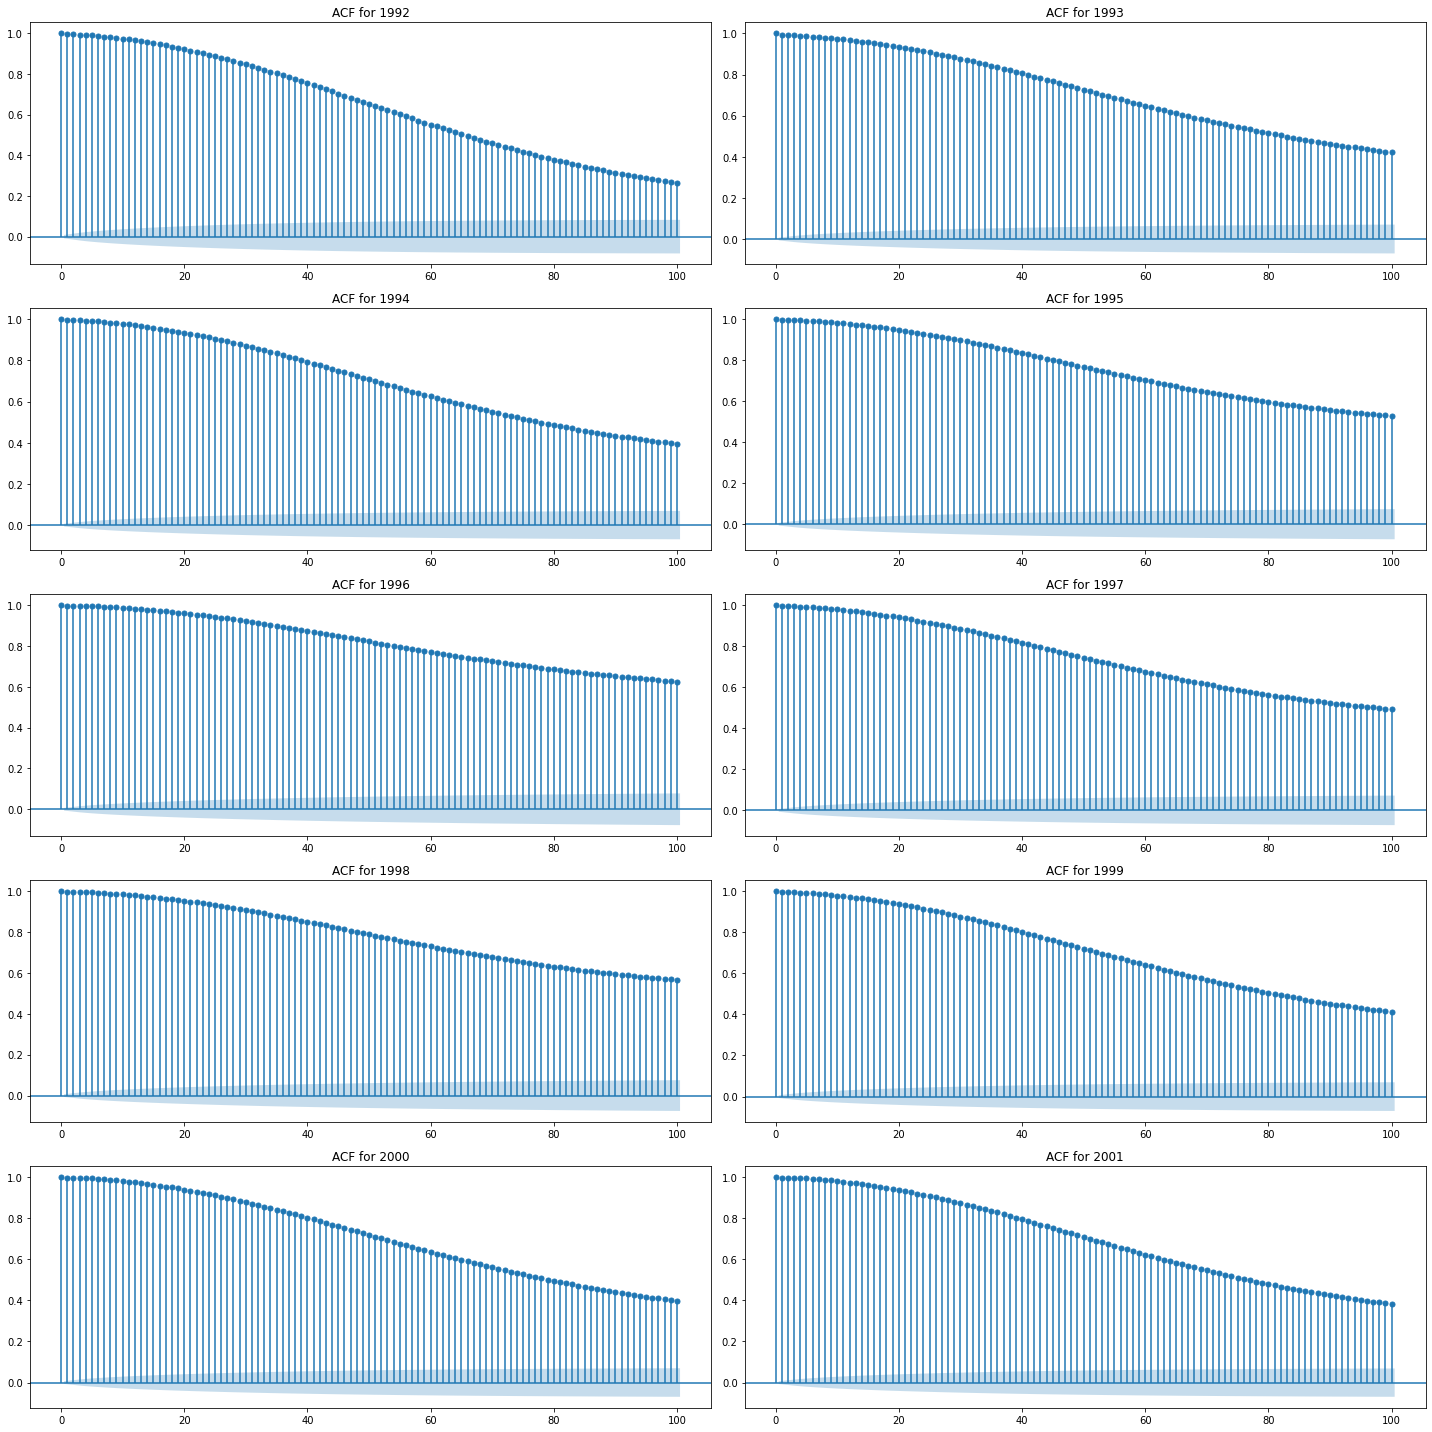

In [53]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(5,2,figsize=(20,20))

data = df1992noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[0,0])
axes[0,0].set_title('ACF for 1992')

data = df1993noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[0,1])
axes[0,1].set_title('ACF for 1993')


data = df1994noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[1,0])
axes[1,0].set_title('ACF for 1994')

data = df1995noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[1,1])
axes[1,1].set_title('ACF for 1995')


data = df1996noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[2,0])
axes[2,0].set_title('ACF for 1996')

data = df1997noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[2,1])
axes[2,1].set_title('ACF for 1997')


data = df1998noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[3,0])
axes[3,0].set_title('ACF for 1998')

data = df1999noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[3,1])
axes[3,1].set_title('ACF for 1999')


data = df2000noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[4,0])
axes[4,0].set_title('ACF for 2000')

data = df2001noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[4,1])
axes[4,1].set_title('ACF for 2001')

#tight layout
plt.tight_layout()
#save figure
plt.savefig('MorganWhole/ACFFirst10years.png', facecolor='w')
plt.show()



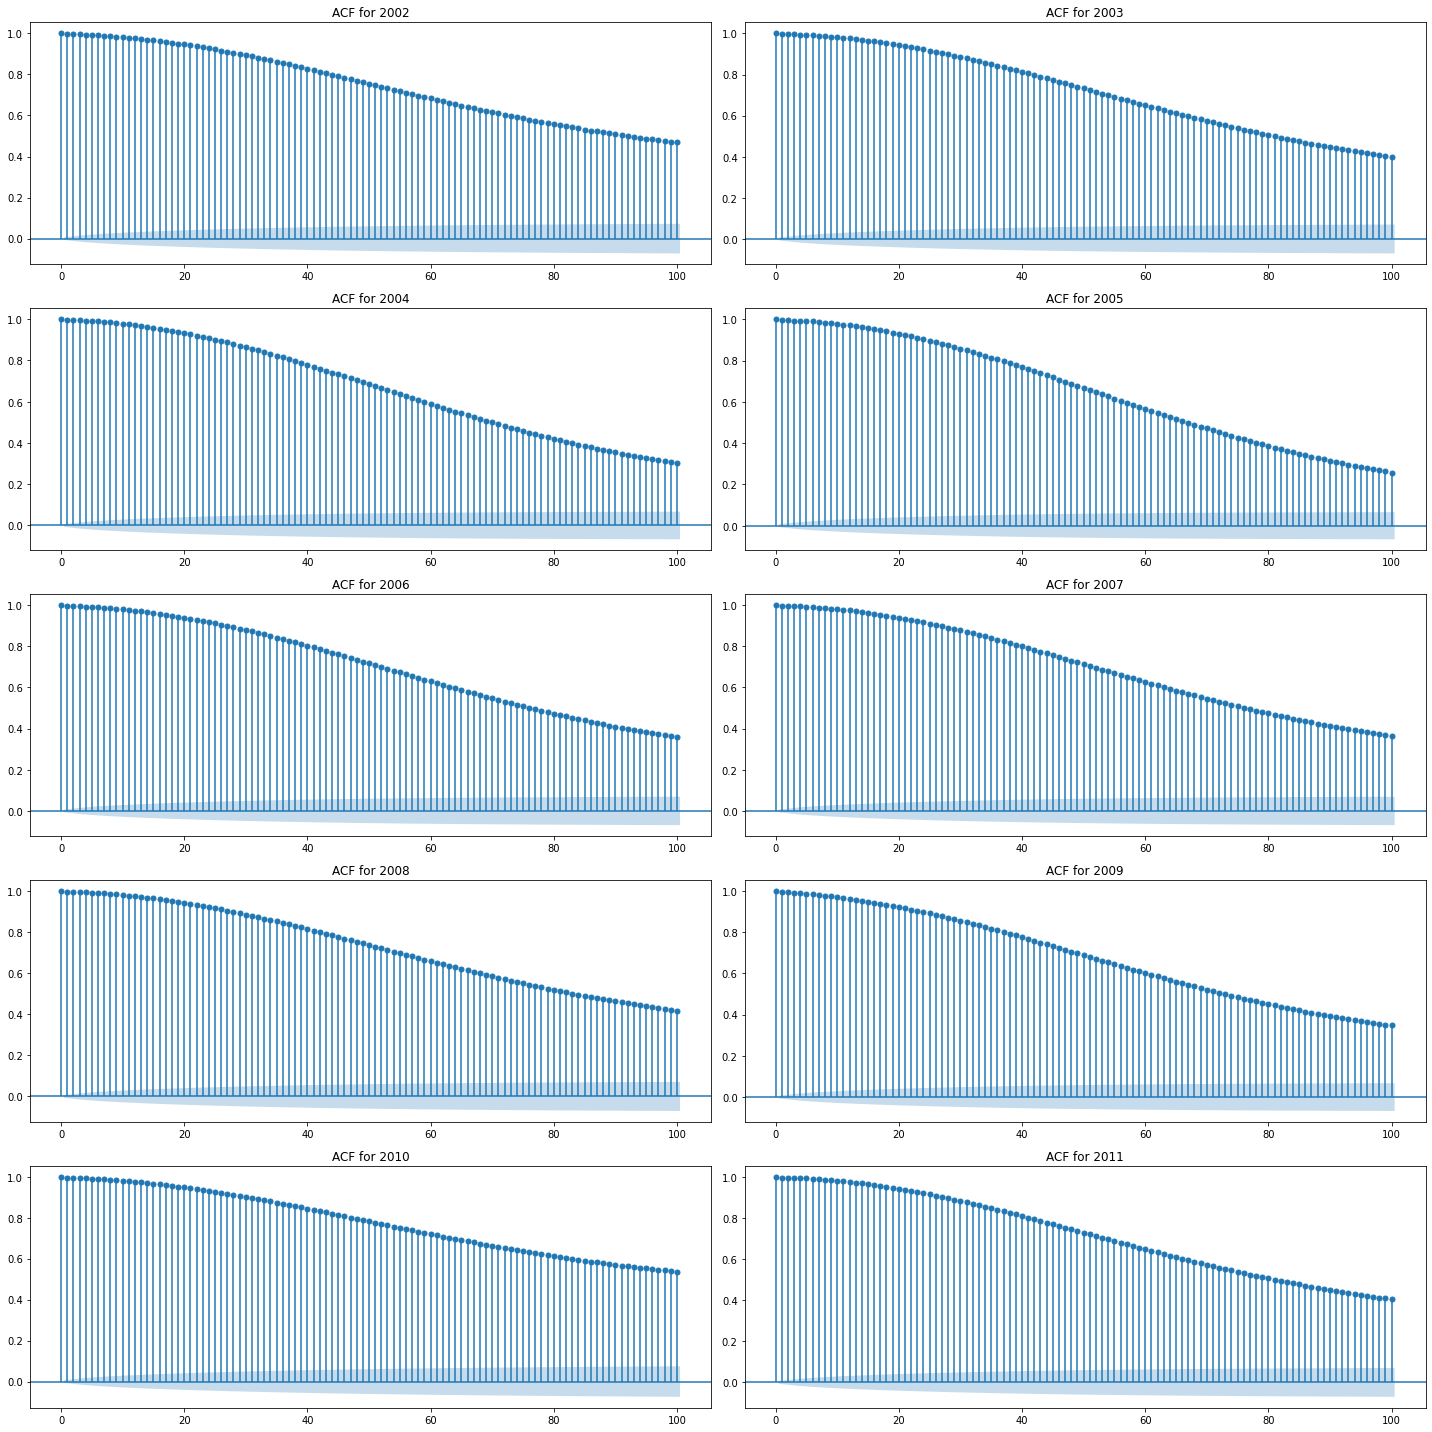

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(5,2,figsize=(20,20))


data = df2002noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[0,0])
axes[0,0].set_title('ACF for 2002')

data = df2003noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[0,1])
axes[0,1].set_title('ACF for 2003')

data = df2004noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[1,0])
axes[1,0].set_title('ACF for 2004')

data = df2005noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[1,1])
axes[1,1].set_title('ACF for 2005')

data = df2006noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[2,0])
axes[2,0].set_title('ACF for 2006')

data = df2007noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[2,1])
axes[2,1].set_title('ACF for 2007')

data = df2008noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[3,0])
axes[3,0].set_title('ACF for 2008')

data = df2009noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[3,1])
axes[3,1].set_title('ACF for 2009')

data = df2010noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[4,0])
axes[4,0].set_title('ACF for 2010')

data = df2011noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[4,1])
axes[4,1].set_title('ACF for 2011')

plt.tight_layout()
plt.savefig('MorganWhole/ACFSecond10years.png', facecolor='w')
plt.show()



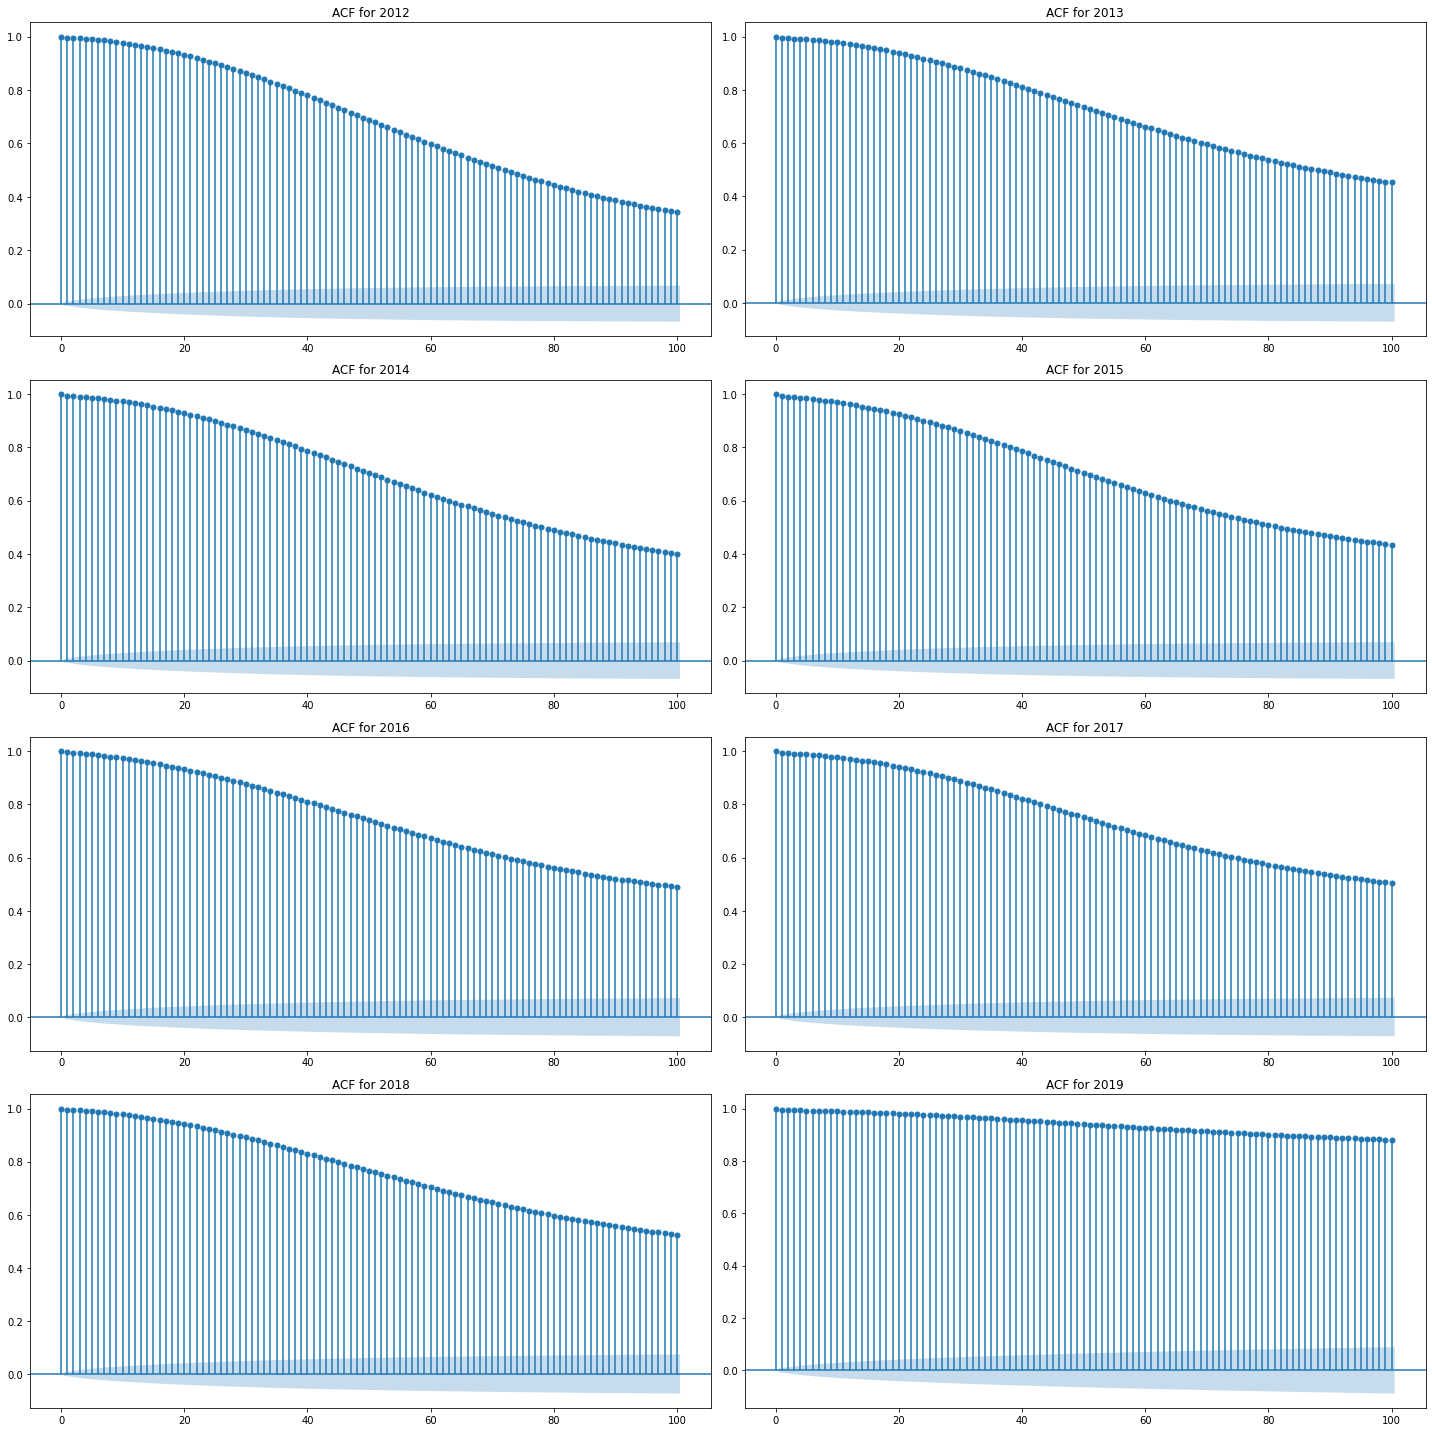

In [55]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(4,2,figsize=(20,20))

data = df2012noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[0,0])
axes[0,0].set_title('ACF for 2012')

data = df2013noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[0,1])
axes[0,1].set_title('ACF for 2013')

data = df2014noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[1,0])
axes[1,0].set_title('ACF for 2014')

data = df2015noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[1,1])
axes[1,1].set_title('ACF for 2015')

data = df2016noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[2,0])
axes[2,0].set_title('ACF for 2016')

data = df2017noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[2,1])
axes[2,1].set_title('ACF for 2017')

data = df2018noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[3,0])
axes[3,0].set_title('ACF for 2018')

data = df2019noOutlier['TideHeight']
plot_acf(data,lags=100, ax=axes[3,1])
axes[3,1].set_title('ACF for 2019')

plt.tight_layout()
plt.savefig('MorganWhole/ACFLAST8years.png', facecolor='w')
plt.show()




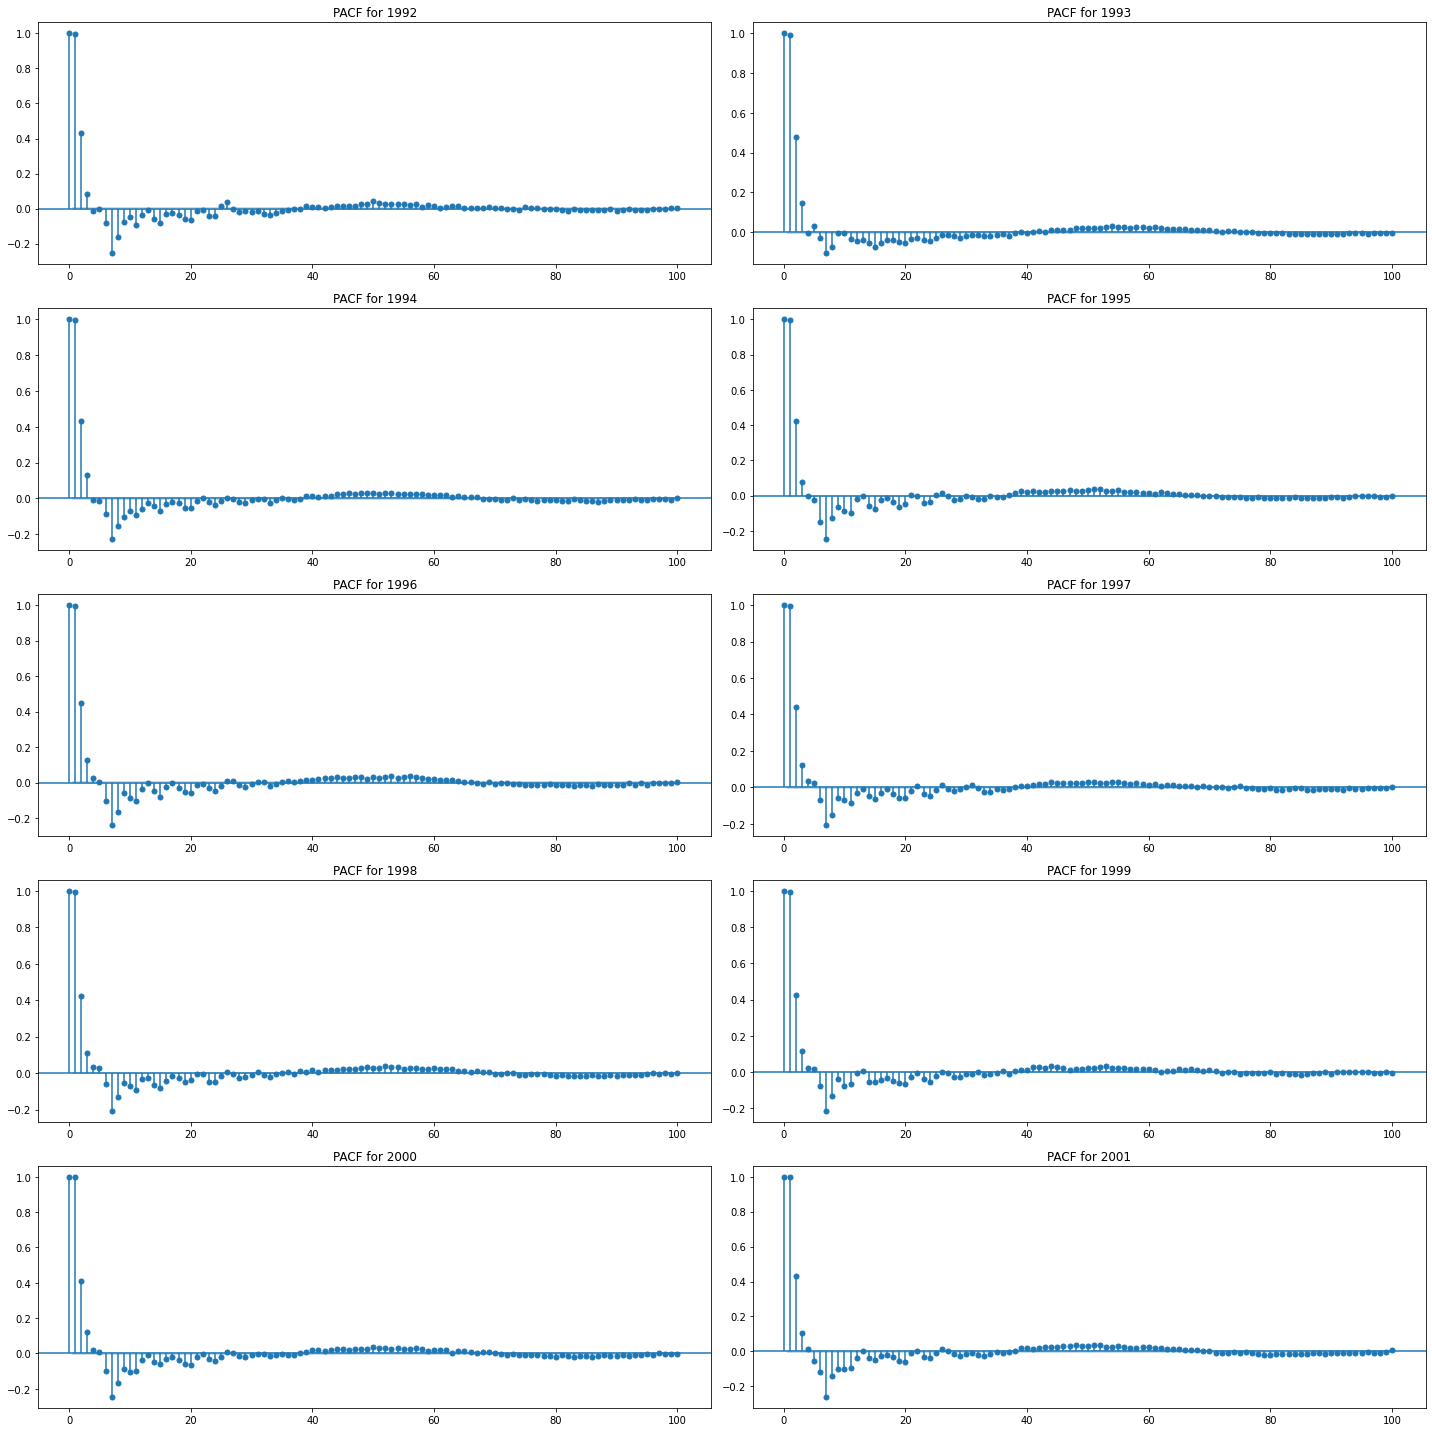

In [56]:
import pandas as pd
from matplotlib import pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(5,2,figsize=(20,20))

data = df1992noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[0,0])
axes[0,0].set_title('PACF for 1992')

data = df1993noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[0,1])
axes[0,1].set_title('PACF for 1993')

data = df1994noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[1,0])
axes[1,0].set_title('PACF for 1994')

data = df1995noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[1,1])
axes[1,1].set_title('PACF for 1995')

data = df1996noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[2,0])
axes[2,0].set_title('PACF for 1996')

data = df1997noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[2,1])
axes[2,1].set_title('PACF for 1997')

data = df1998noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[3,0])
axes[3,0].set_title('PACF for 1998')

data = df1999noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[3,1])
axes[3,1].set_title('PACF for 1999')

data = df2000noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[4,0])
axes[4,0].set_title('PACF for 2000')

data = df2001noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[4,1])
axes[4,1].set_title('PACF for 2001')

plt.tight_layout()
plt.savefig('MorganWhole/PACFFirst10years.png', facecolor='w')
plt.show()


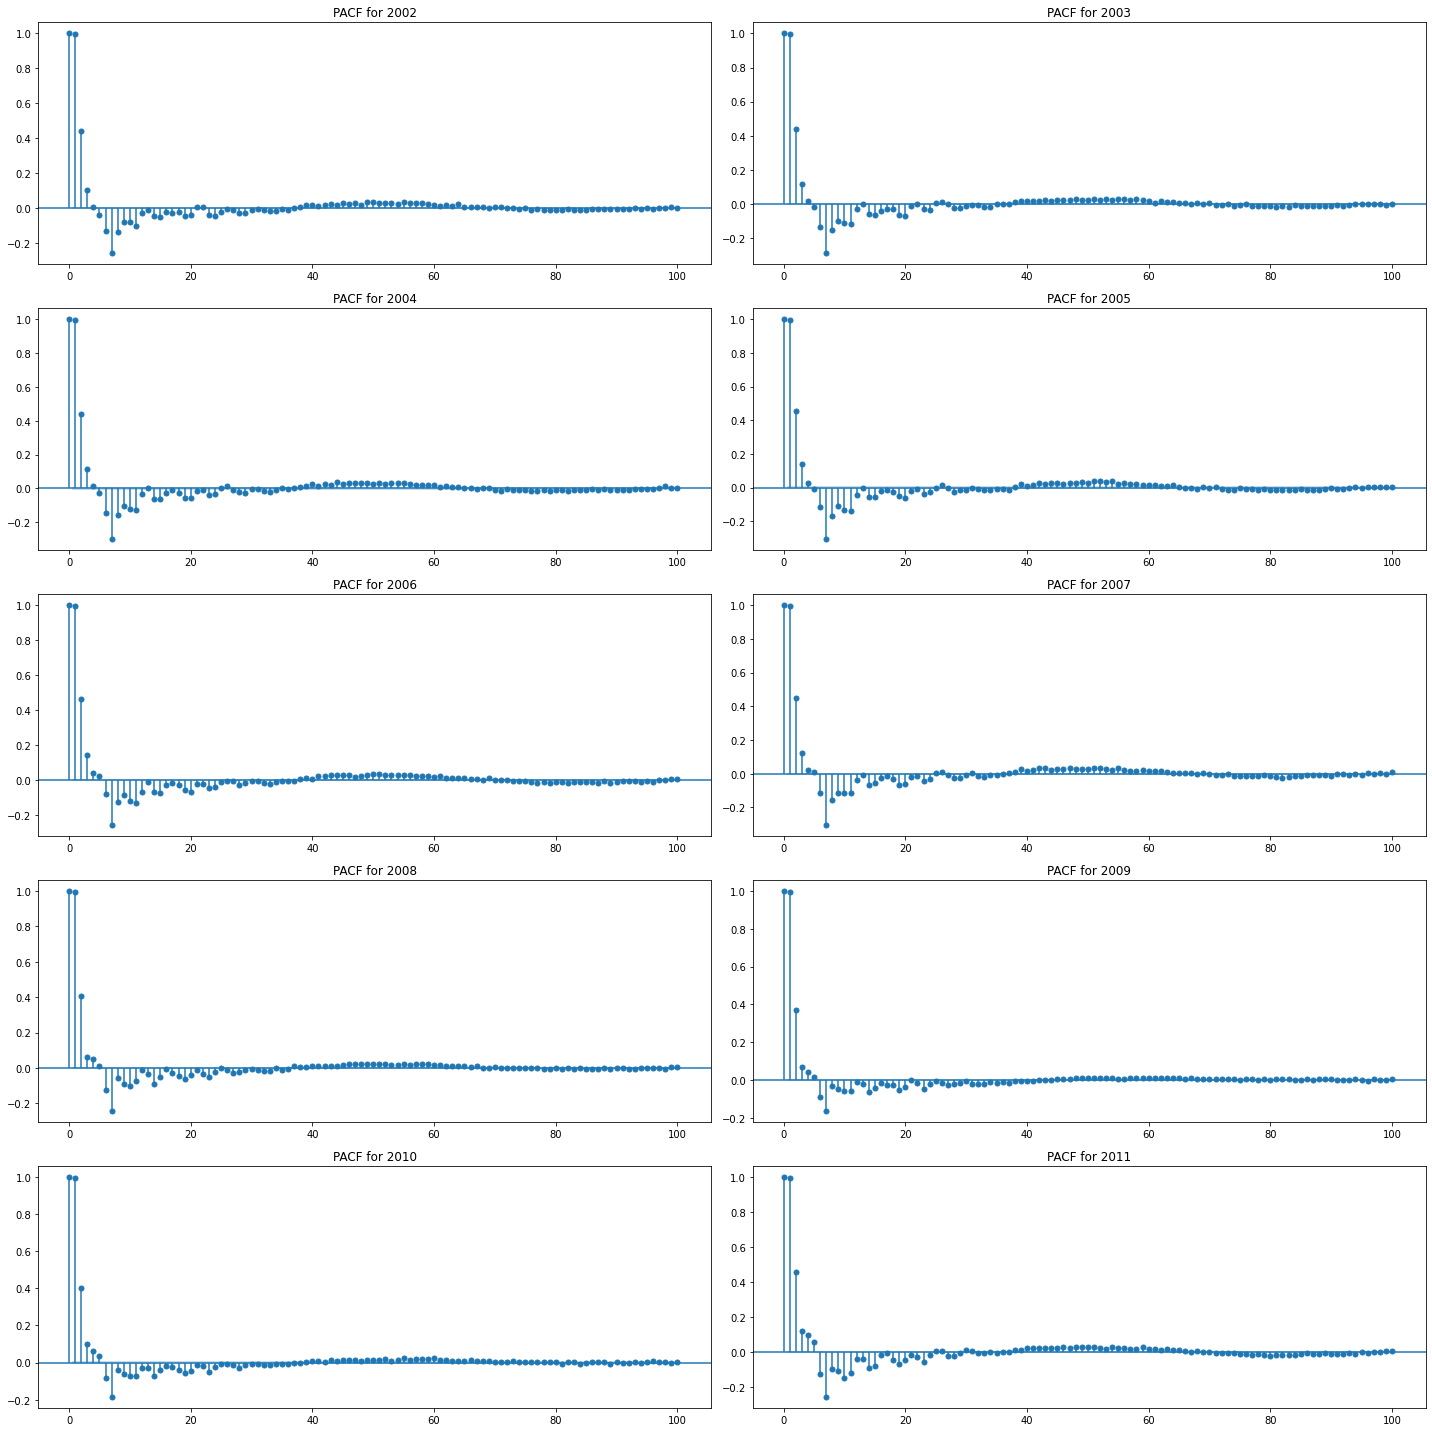

In [57]:
import pandas as pd
from matplotlib import pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(5,2,figsize=(20,20))

data = df2002noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[0,0])
axes[0,0].set_title('PACF for 2002')

data = df2003noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[0,1])
axes[0,1].set_title('PACF for 2003')

data = df2004noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[1,0])
axes[1,0].set_title('PACF for 2004')

data = df2005noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[1,1])
axes[1,1].set_title('PACF for 2005')

data = df2006noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[2,0])
axes[2,0].set_title('PACF for 2006')

data = df2007noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[2,1])
axes[2,1].set_title('PACF for 2007')

data = df2008noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[3,0])
axes[3,0].set_title('PACF for 2008')

data = df2009noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[3,1])
axes[3,1].set_title('PACF for 2009')

data = df2010noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[4,0])
axes[4,0].set_title('PACF for 2010')

data = df2011noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[4,1])
axes[4,1].set_title('PACF for 2011')

plt.tight_layout()
plt.savefig('MorganWhole/PACFNext10years.png', facecolor='w')


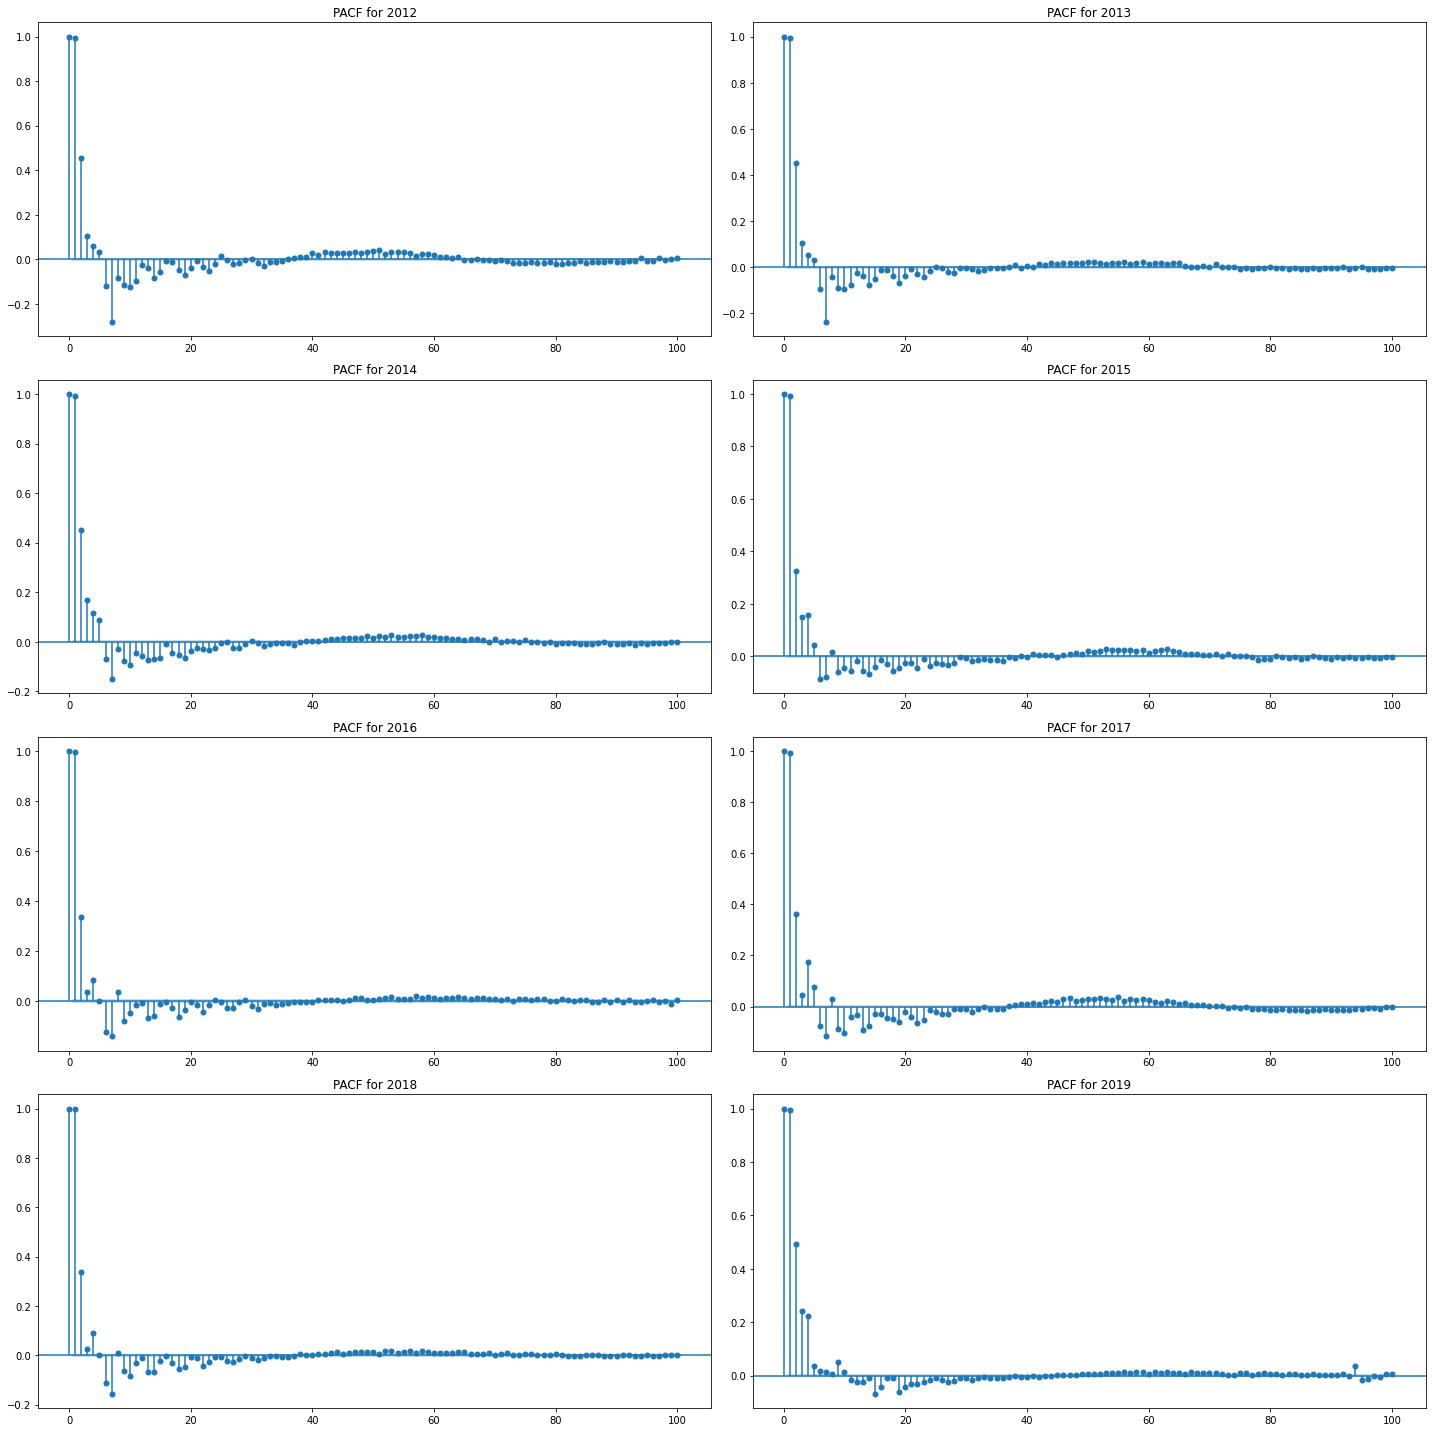

In [58]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(4,2,figsize=(20,20))

data = df2012noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[0,0])
axes[0,0].set_title('PACF for 2012')

data = df2013noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[0,1])
axes[0,1].set_title('PACF for 2013')

data = df2014noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[1,0])
axes[1,0].set_title('PACF for 2014')

data = df2015noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[1,1])
axes[1,1].set_title('PACF for 2015')

data = df2016noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[2,0])
axes[2,0].set_title('PACF for 2016')

data = df2017noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[2,1])
axes[2,1].set_title('PACF for 2017')

data = df2018noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[3,0])
axes[3,0].set_title('PACF for 2018')

data = df2019noOutlier['TideHeight']
plot_pacf(data,lags=100, ax=axes[3,1])
axes[3,1].set_title('PACF for 2019')

plt.tight_layout()
plt.savefig('MorganWhole/PACFLast8years.png', facecolor='w')
plt.show()



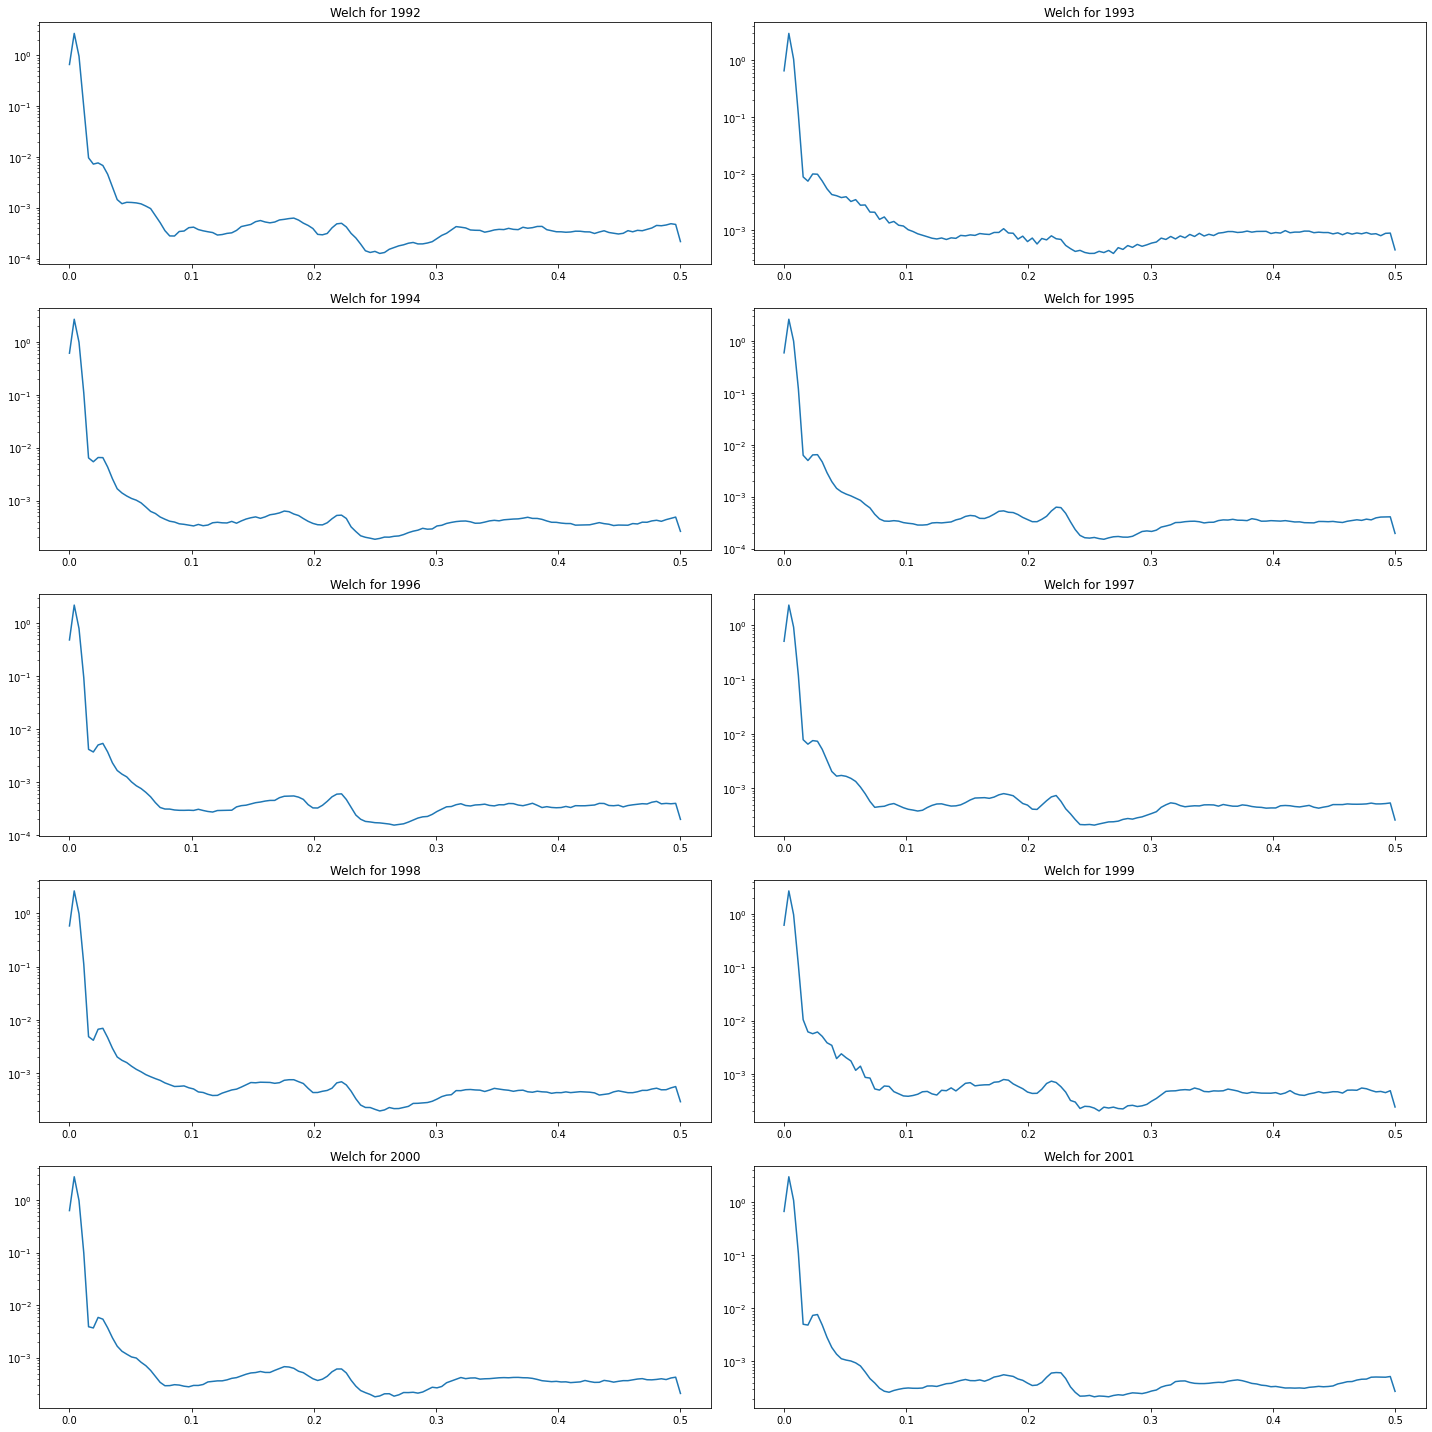

In [59]:
from scipy import signal   

import matplotlib.pyplot as plt

#create subplots
fig, axes = plt.subplots(5,2,figsize=(20,20))

a = df1992noOutlier['TideHeight']
f, pxx_den = signal.welch(a,fs=1)
axes[0,0].semilogy(f, pxx_den)
axes[0,0].set_title('Welch for 1992')

b = df1993noOutlier['TideHeight']
f, pxx_den = signal.welch(b,fs=1)
axes[0,1].semilogy(f, pxx_den)
axes[0,1].set_title('Welch for 1993')

c = df1994noOutlier['TideHeight']
f, pxx_den = signal.welch(c,fs=1)
axes[1,0].semilogy(f, pxx_den)
axes[1,0].set_title('Welch for 1994')

d = df1995noOutlier['TideHeight']
f, pxx_den = signal.welch(d,fs=1)
axes[1,1].semilogy(f, pxx_den)
axes[1,1].set_title('Welch for 1995')

e = df1996noOutlier['TideHeight']
f, pxx_den = signal.welch(e,fs=1)
axes[2,0].semilogy(f, pxx_den)
axes[2,0].set_title('Welch for 1996')

f = df1997noOutlier['TideHeight']
f, pxx_den = signal.welch(f,fs=1)
axes[2,1].semilogy(f, pxx_den)
axes[2,1].set_title('Welch for 1997')

g = df1998noOutlier['TideHeight']
f, pxx_den = signal.welch(g,fs=1)
axes[3,0].semilogy(f, pxx_den)
axes[3,0].set_title('Welch for 1998')

h = df1999noOutlier['TideHeight']
f, pxx_den = signal.welch(h,fs=1)
axes[3,1].semilogy(f, pxx_den)
axes[3,1].set_title('Welch for 1999')

i = df2000noOutlier['TideHeight']
f, pxx_den = signal.welch(i,fs=1)
axes[4,0].semilogy(f, pxx_den)
axes[4,0].set_title('Welch for 2000')

j = df2001noOutlier['TideHeight']
f, pxx_den = signal.welch(j,fs=1)
axes[4,1].semilogy(f, pxx_den)
axes[4,1].set_title('Welch for 2001')


plt.tight_layout()
plt.savefig('MorganWhole/WelchFirst10years.png', facecolor='w')
plt.show()

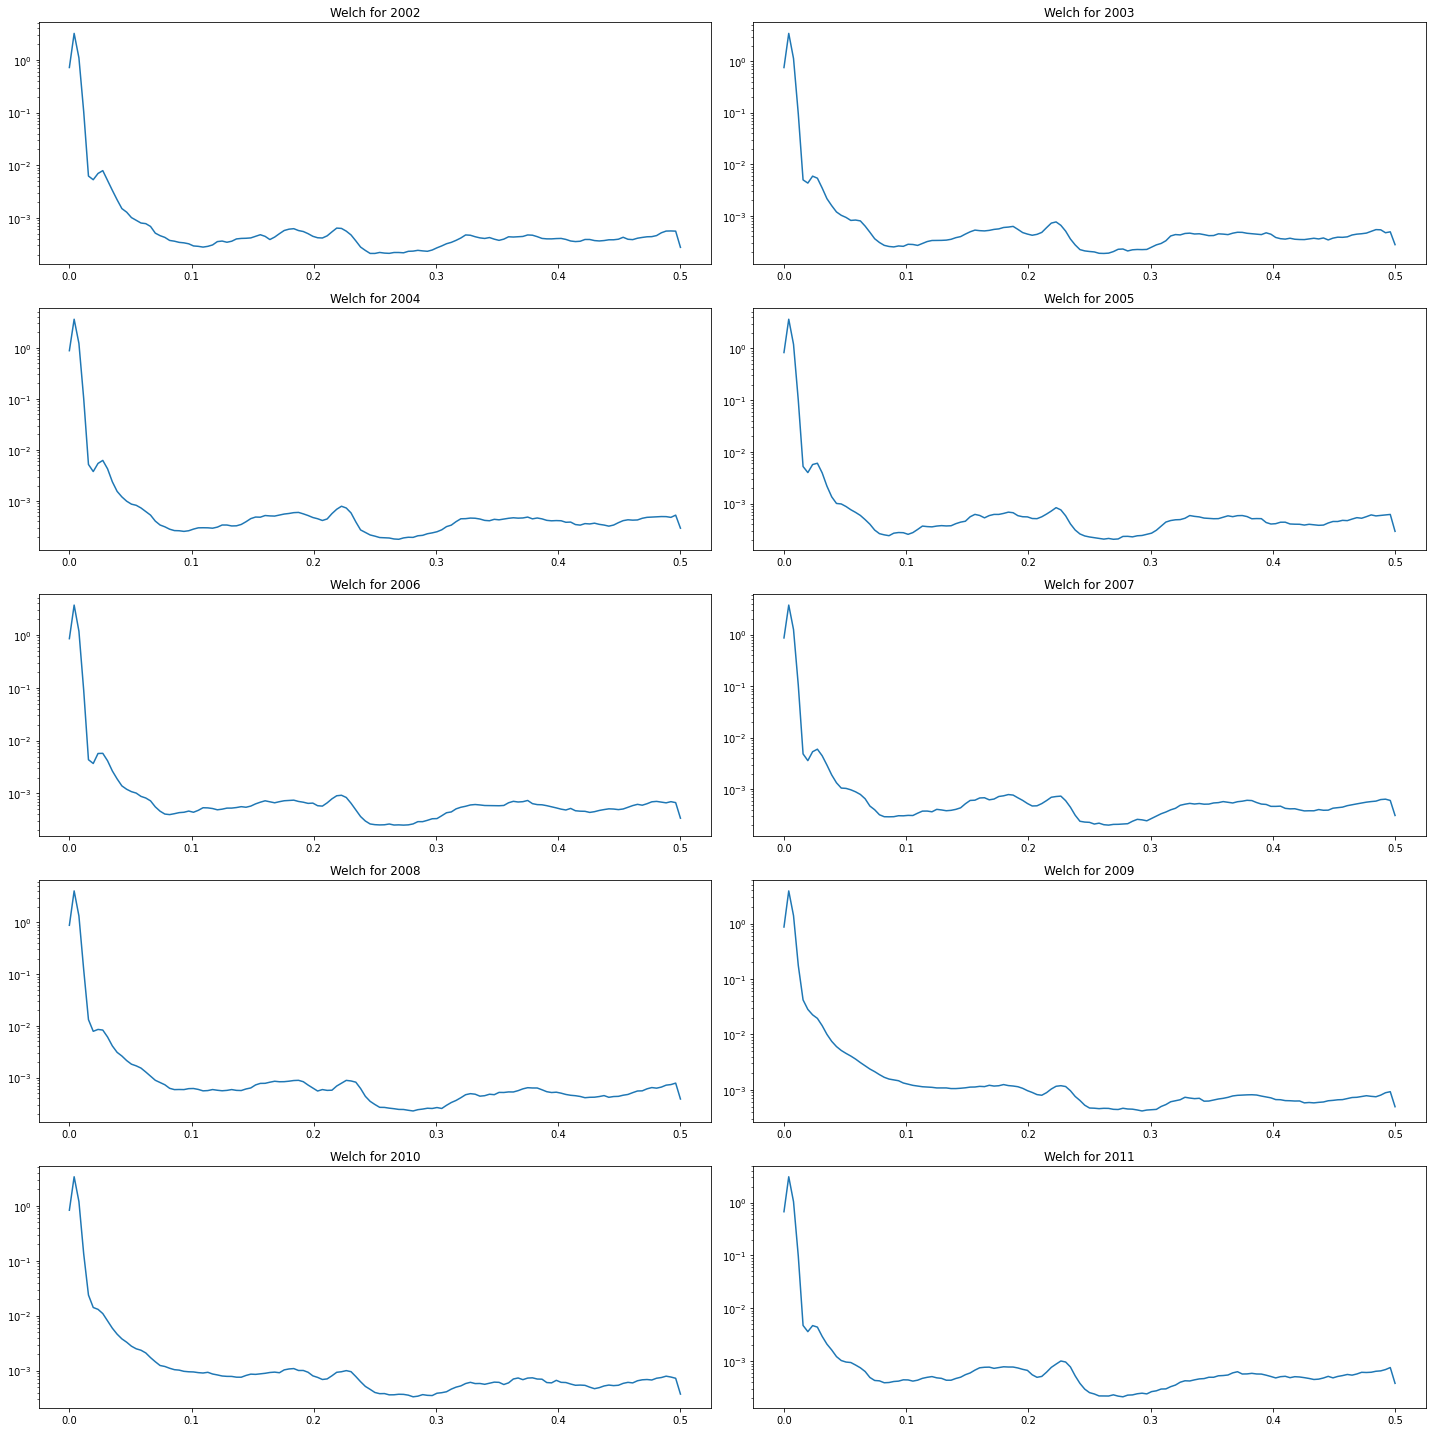

In [60]:
from scipy import signal   

import matplotlib.pyplot as plt

#create subplots
fig, axes = plt.subplots(5,2,figsize=(20,20))

a = df2002noOutlier['TideHeight']
f, pxx_den = signal.welch(a,fs=1)
axes[0,0].semilogy(f, pxx_den)
axes[0,0].set_title('Welch for 2002')

b = df2003noOutlier['TideHeight']
f, pxx_den = signal.welch(b,fs=1)
axes[0,1].semilogy(f, pxx_den)
axes[0,1].set_title('Welch for 2003')

c = df2004noOutlier['TideHeight']
f, pxx_den = signal.welch(c,fs=1)
axes[1,0].semilogy(f, pxx_den)
axes[1,0].set_title('Welch for 2004')

d = df2005noOutlier['TideHeight']
f, pxx_den = signal.welch(d,fs=1)
axes[1,1].semilogy(f, pxx_den)
axes[1,1].set_title('Welch for 2005')

e = df2006noOutlier['TideHeight']
f, pxx_den = signal.welch(e,fs=1)
axes[2,0].semilogy(f, pxx_den)
axes[2,0].set_title('Welch for 2006')

f= df2007noOutlier['TideHeight']
f, pxx_den = signal.welch(f,fs=1)
axes[2,1].semilogy(f, pxx_den)
axes[2,1].set_title('Welch for 2007')

g = df2008noOutlier['TideHeight']   
f, pxx_den = signal.welch(g,fs=1)
axes[3,0].semilogy(f, pxx_den)
axes[3,0].set_title('Welch for 2008')

h = df2009noOutlier['TideHeight']
f, pxx_den = signal.welch(h,fs=1)
axes[3,1].semilogy(f, pxx_den)
axes[3,1].set_title('Welch for 2009')

i = df2010noOutlier['TideHeight']
f, pxx_den = signal.welch(i,fs=1)
axes[4,0].semilogy(f, pxx_den)
axes[4,0].set_title('Welch for 2010')

j = df2011noOutlier['TideHeight']
f, pxx_den = signal.welch(j,fs=1)
axes[4,1].semilogy(f, pxx_den)
axes[4,1].set_title('Welch for 2011')


plt.tight_layout()
plt.savefig('MorganWhole/WelchNext10years.png', facecolor='w')
plt.show()


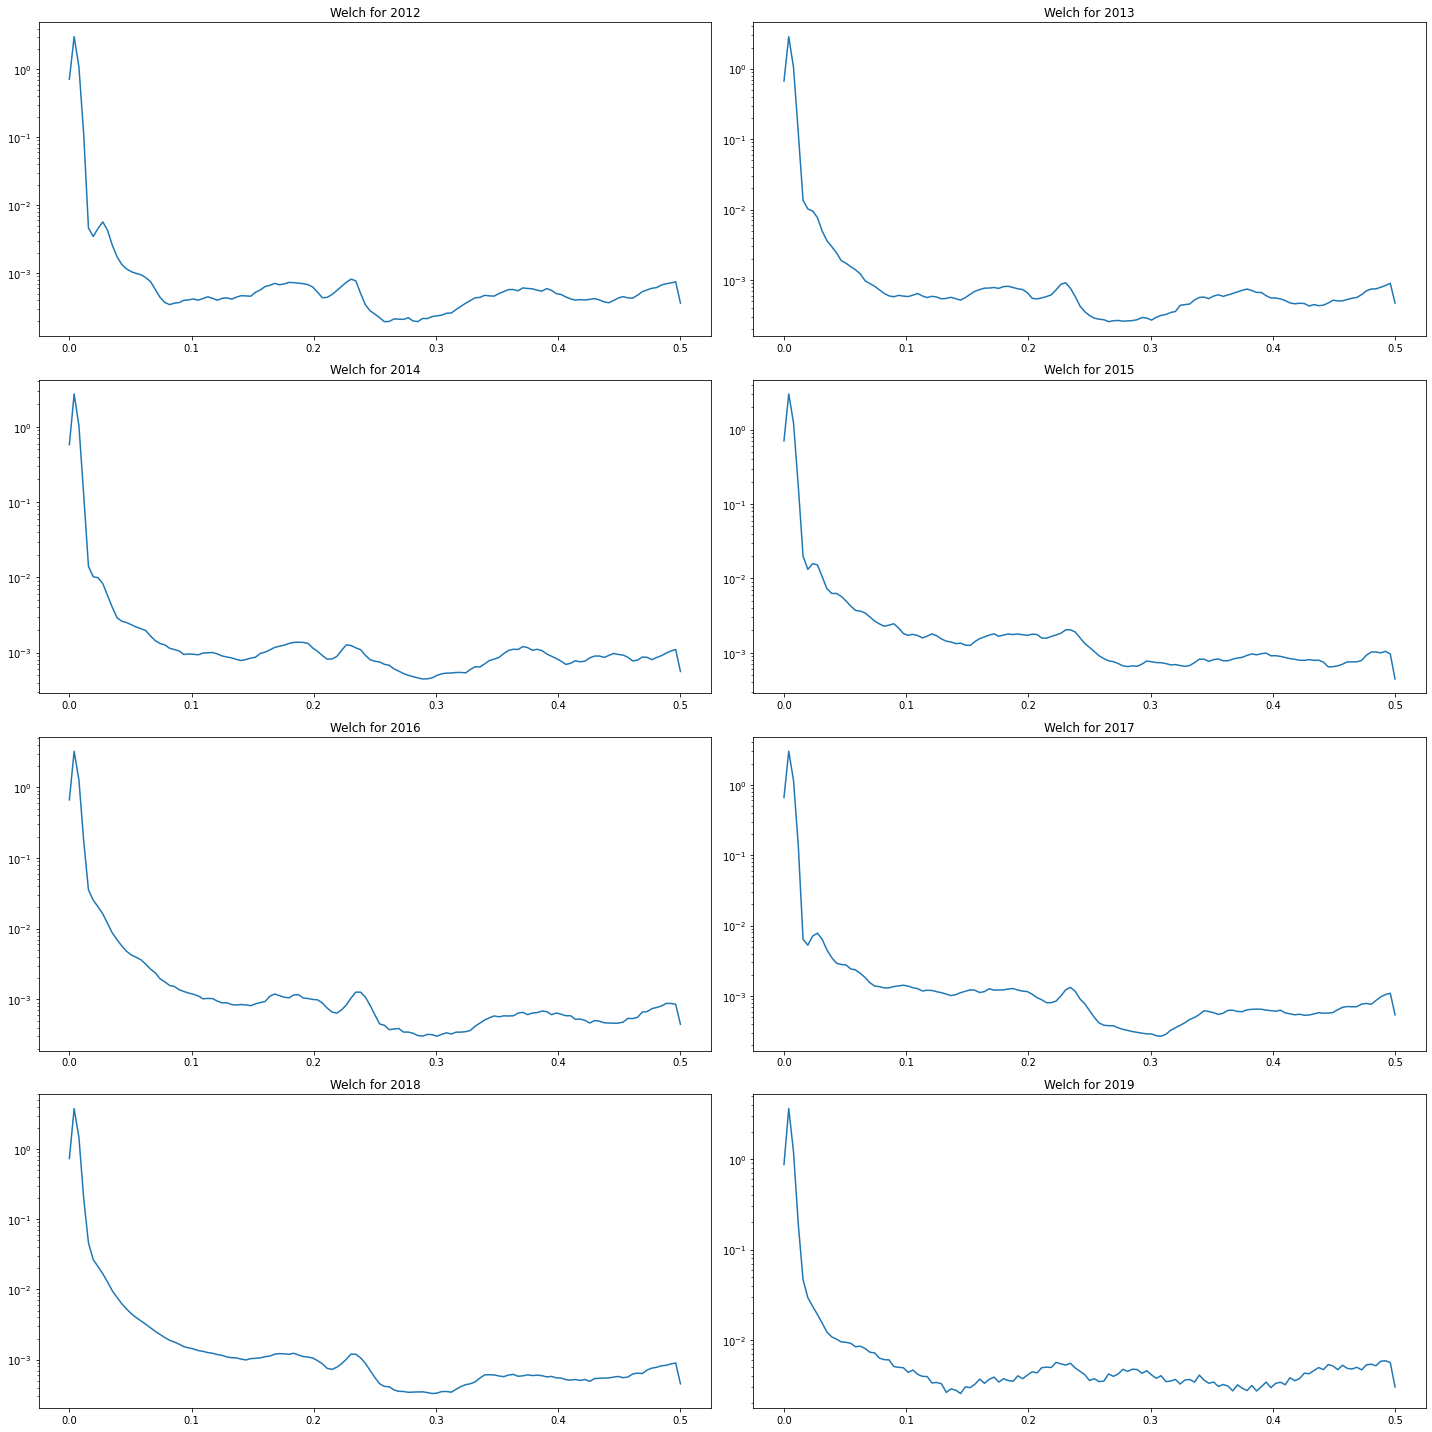

In [61]:
from scipy import signal   

import matplotlib.pyplot as plt

#create subplots
fig, axes = plt.subplots(4,2,figsize=(20,20))

a = df2012noOutlier['TideHeight']
f, pxx_den = signal.welch(a,fs=1)
axes[0,0].semilogy(f, pxx_den)
axes[0,0].set_title('Welch for 2012')

b = df2013noOutlier['TideHeight']
f, pxx_den = signal.welch(b,fs=1)
axes[0,1].semilogy(f, pxx_den)
axes[0,1].set_title('Welch for 2013')

c = df2014noOutlier['TideHeight']
f, pxx_den = signal.welch(c,fs=1)
axes[1,0].semilogy(f, pxx_den)
axes[1,0].set_title('Welch for 2014')

d = df2015noOutlier['TideHeight']
f, pxx_den = signal.welch(d,fs=1)
axes[1,1].semilogy(f, pxx_den)
axes[1,1].set_title('Welch for 2015')

e = df2016noOutlier['TideHeight']
f, pxx_den = signal.welch(e,fs=1)
axes[2,0].semilogy(f, pxx_den)
axes[2,0].set_title('Welch for 2016')

f = df2017noOutlier['TideHeight']
f, pxx_den = signal.welch(f,fs=1)
axes[2,1].semilogy(f, pxx_den)
axes[2,1].set_title('Welch for 2017')

g = df2018noOutlier['TideHeight']
f, pxx_den = signal.welch(g,fs=1)
axes[3,0].semilogy(f, pxx_den)
axes[3,0].set_title('Welch for 2018')

h = df2019noOutlier['TideHeight']
f, pxx_den = signal.welch(h,fs=1)
axes[3,1].semilogy(f, pxx_den)
axes[3,1].set_title('Welch for 2019')

plt.tight_layout()
plt.savefig('MorganWhole/WelchLast8years.png', facecolor='w')
plt.show()
